In [9]:
# utility
import sys
sys.path.append("..")

import utility

# imports
import numpy as np
import json

# modelling
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split

# Tree Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# misc
import os

In [10]:
# function to load and preprocess quickdraw data
def load_quickdraw_data(dir, category_name, n_samples=1000):
    file = f'full_numpy_bitmap_{category_name}.npy'
    data = np.load(dir + file)
    if n_samples == -1:
        return data
    else:
        indices = np.random.choice(len(data), n_samples, replace=False)
        sampled_data = data[indices]
        return sampled_data

In [11]:
def data_generator(data, batch_size=512):
    n_samples = len(data)
    for i in range(0, n_samples, batch_size):
        batch = data[i:i + batch_size]
        yield batch

In [12]:
files = os.listdir('../data/')
categories = [file.split('_')[-1].split('.')[0] for file in files]

In [13]:
# Data directory
dir = '../data/'

# Load and preprocess data
all_data = []
labels = []

In [14]:
for category_name in categories:
    category_data = load_quickdraw_data(dir, category_name, 100) # Change this to -1 for all data
    all_data.extend(category_data)
    labels.extend([category_name] * len(category_data))

In [15]:
# split the data into training and test
x_train, x_test, y_train, y_test = train_test_split(all_data, labels, test_size=0.2, random_state=42)

print(len(all_data))

34500


In [16]:
# normalize data
x_train = np.array(x_train).astype(np.float32) / 255
x_test = np.array(x_test).astype(np.float32) / 255

In [17]:
# Train the LOF model using data generator
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.05)

# List to store anomaly scores
anomaly_scores = []

for batch in data_generator(x_train):
    # Train the LOF model
    lof.fit(batch)
    # Get the negative outlier factor scores for each sample in the batch
    batch_scores = -lof.negative_outlier_factor_
    anomaly_scores.extend(batch_scores)

In [18]:
# Predict anomalies using data generator
y_pred = []

for batch in data_generator(x_test):
    # Predict anomalies for the current batch
    batch_pred = lof.fit_predict(batch)
    y_pred.extend(batch_pred)

In [19]:
print(y_pred)
y_pred = np.array(y_pred)

[1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1

In [20]:
# Get anomaly indexes
anomaly_indexes = np.where(y_pred == -1)[0]

# Display the anomaly indices
print("Anomaly Indexes:", anomaly_indexes)
print(len(anomaly_indexes))

Anomaly Indexes: [   3   13   42   74   77  112  126  147  151  178  187  202  254  259
  277  287  292  318  322  326  339  340  444  451  462  489  515  521
  536  538  572  609  649  669  680  762  786  839  844  849  888  889
  949  956  958  966  974  975  982 1013 1014 1018 1040 1123 1126 1163
 1165 1189 1203 1213 1242 1245 1246 1264 1271 1283 1285 1289 1294 1325
 1358 1361 1399 1402 1497 1507 1518 1534 1537 1542 1567 1589 1602 1616
 1623 1628 1674 1704 1743 1756 1766 1774 1789 1822 1824 1856 1902 1908
 1914 1925 1932 1947 1966 2000 2067 2093 2098 2100 2140 2169 2210 2255
 2257 2299 2326 2394 2417 2422 2431 2437 2444 2472 2487 2489 2496 2510
 2521 2532 2534 2551 2565 2566 2594 2612 2629 2633 2650 2658 2669 2680
 2706 2722 2733 2807 2841 2848 2895 2908 2919 2928 2943 2955 2974 2982
 3039 3055 3073 3075 3135 3159 3176 3184 3211 3213 3240 3265 3302 3331
 3339 3348 3363 3390 3397 3398 3424 3459 3492 3515 3517 3529 3534 3558
 3587 3589 3603 3642 3647 3665 3679 3690 3712 3730 3763 3793

In [21]:
# Convert the list of anomaly indexes to a NumPy array
anomaly_indexes_array = np.array(anomaly_indexes, dtype=int)

# Extract labels of anomalies
anomaly_labels = [y_test[i] for i in anomaly_indexes_array]

# Display the anomaly labels
print("Anomaly Labels:", anomaly_labels)

Anomaly Labels: ['bench', 'flip flops', 'hourglass', 'bandage', 'tractor', 'coffee cup', 'paint can', 'lion', 'castle', 'barn', 'star', 'snail', 'tree', 'hot tub', 'rain', 'purse', 'police car', 'dumbbell', 'star', 'monkey', 'sandwich', 'radio', 'duck', 'coffee cup', 'cake', 'octopus', 'baseball', 'toilet', 'cake', 'barn', 'headphones', 'teapot', 'butterfly', 'binoculars', 'couch', 'owl', 'tree', 'sock', 'saxophone', 'parachute', 'laptop', 'bicycle', 'elephant', 'tractor', 'mushroom', 'mug', 'table', 'rain', 'mug', 'flower', 'butterfly', 'flower', 'school bus', 'hamburger', 'stove', 'panda', 'bush', 'hot air balloon', 'parachute', 'spoon', 'saxophone', 'soccer ball', 'axe', 'backpack', 'snowflake', 'giraffe', 'floor lamp', 'postcard', 'moustache', 'ant', 'face', 'beach', 'toilet', 'bicycle', 'purse', 'tractor', 'swing set', 'parrot', 'sailboat', 'drill', 'potato', 'stop sign', 'squiggle', 'castle', 'hamburger', 'motorbike', 'hand', 'goatee', 'pool', 'octopus', 'laptop', 'diamond', 'sno

In [22]:
# Extract anomaly images from the test set
anomalies = [x_test[i] for i in anomaly_indexes_array]

print(len(anomalies))

351


In [23]:
# create a dict of indexes and labels
anomaly_dict = dict(zip(map(int, anomaly_indexes), anomaly_labels))

In [24]:
# write to json file
json_filename = "anomalies.json"
with open(json_filename, 'w') as json_file:
    json.dump(anomaly_dict, json_file)

print(f"Anomaly dictionary saved to {json_filename}")

Anomaly dictionary saved to anomalies.json


In [25]:
# Reshape the test data for plotting
x_test_reshaped = x_test.reshape(-1, 28, 28)

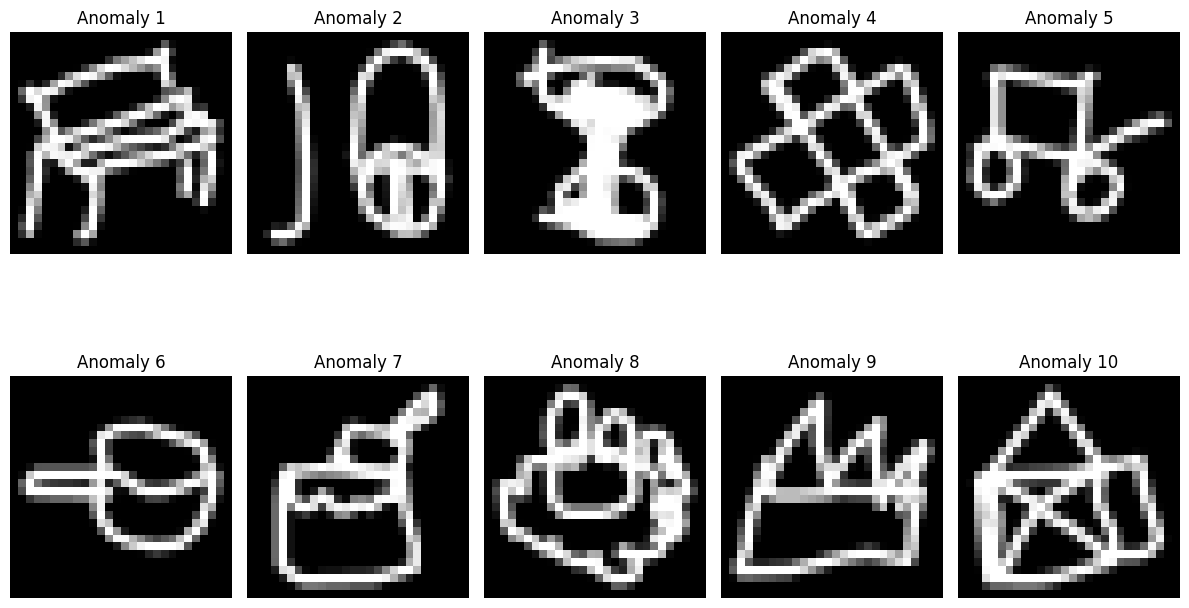

In [26]:
# Plot some of the anomalies
plt.figure(figsize=(12, 8))
for i, idx in enumerate(anomaly_indexes[:10]):  # Plot the first 10 anomalies
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_reshaped[idx], cmap='gray')
    plt.title(f'Anomaly {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [27]:
anomaly_scores = np.array(anomaly_scores)

# Display the anomaly scores
print("Anomaly Scores:", anomaly_scores[anomaly_indexes])

Anomaly Scores: [1.1540263  1.2386605  0.9859873  1.197244   1.0455424  1.017521
 1.0056981  1.1755024  1.0221605  1.0864575  1.0116932  1.1659052
 1.233465   1.0416467  0.98801786 1.0346621  1.1725919  1.0814756
 1.0867599  1.2867868  1.1642108  1.1589303  1.0399057  0.98933756
 1.229513   1.1017153  1.0034566  1.01496    1.3329791  1.1246302
 0.99025834 1.0916524  1.0333308  1.1118581  1.1937721  1.0060815
 1.0492585  1.0800118  1.2095255  1.0503254  1.0879413  0.99000484
 1.1344151  1.0836825  1.0026453  1.2556658  1.1270506  1.1228062
 1.1299689  1.0952907  1.0408212  1.3744565  1.0121658  1.0986027
 1.1388614  0.99166775 1.1234233  0.98931235 1.1753695  1.0531905
 1.1073306  1.0762203  1.0466578  1.0620642  1.0584238  1.1099083
 1.0344322  1.2084812  1.1364868  1.1631243  0.9826957  1.2120563
 1.4150369  1.1134245  1.1985636  1.137662   1.0706193  1.2853057
 1.1070309  1.1264791  1.1525748  1.0662634  1.0439122  1.0631014
 1.0300999  1.2761527  1.2366898  1.1216924  1.1455923  1.0

c:\Users\zippe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


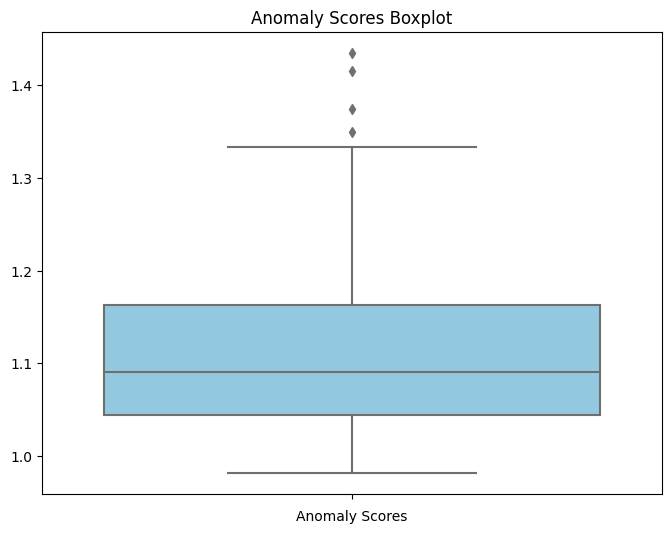

In [28]:
# Plot a boxplot of the reconstruction errors
plt.figure(figsize=(8, 6))
sns.boxplot(y=anomaly_scores[anomaly_indexes_array], color='skyblue')
plt.title('Anomaly Scores Boxplot')
plt.xlabel('Anomaly Scores')
plt.show()

In [ ]:
# Threshold for classifying anomalies based on anomaly scores
threshold = np.percentile(anomaly_scores, 100 * (1 - 0.05))

# Create a set of unique labels
unique_labels = set(labels)
print(len(labels))

# Convert anomaly scores to binary predictions
binary_predictions = (anomaly_scores > threshold).astype(int)

34500


In [ ]:
# Scatter plot of anomalies using anomaly scores and threshold
plt.figure(figsize=(10, 6))
plt.scatter(range(len(anomaly_scores)), anomaly_scores, c=(anomalies_above_threshold), cmap='coolwarm', s=20, alpha=0.7)
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold = {threshold:.2f}')
plt.title("Scatter Plot of Anomalies using Anomaly Scores and Threshold")
plt.xlabel("Instance Index")
plt.ylabel("Anomaly Score")
plt.colorbar(label="Anomaly Prediction")
plt.legend()
plt.show()

In [ ]:
# Convert anomaly scores to binary predictions
binary_predictions = (y_pred == -1).astype(int)

# Convert y_test to binary format (1 for normal, -1 for anomalous)
y_true_binary = np.array([1 if label in unique_labels else -1 for label in y_test[:len(binary_predictions)]])

In [ ]:
# Compute metrics
accuracy = accuracy_score(y_true_binary, binary_predictions)
precision = precision_score(y_true_binary, binary_predictions)
recall = recall_score(y_true_binary, binary_predictions)
f1 = f1_score(y_true_binary, binary_predictions)

In [ ]:
# Display metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.050869565217391305
Precision: 1.0
Recall: 0.050869565217391305
F1 Score: 0.09681423251965246


In [ ]:
# Classification report
report = classification_report(binary_predictions , y_true_binary, target_names=['normal', 'anomaly'])

print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal       0.00      0.00      0.00      6549
     anomaly       0.05      1.00      0.10       351

    accuracy                           0.05      6900
   macro avg       0.03      0.50      0.05      6900
weighted avg       0.00      0.05      0.00      6900



c:\Users\zippe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zippe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zippe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
# Precision-Recall curve and AUC
precision, recall, _ = precision_recall_curve(y_true_binary, y_pred)  # Note the negative y_pred for precision_recall_curve
pr_auc = auc(recall, precision)

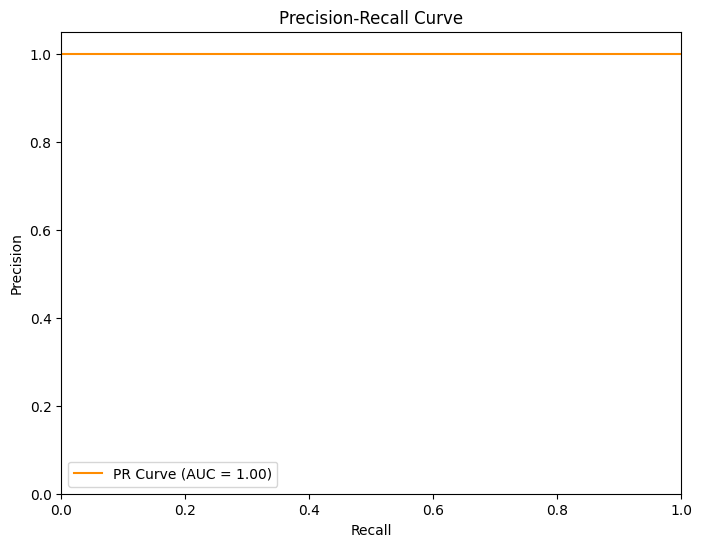

In [ ]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', label='PR Curve (AUC = {:.2f})'.format(pr_auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true_binary, binary_predictions)

In [ ]:
print(conf_matrix)

[[   0    0]
 [6549  351]]


In [ ]:
tn, fp, fn, tp = conf_matrix.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 0
False Positives: 0
False Negatives: 6549
True Positives: 351
